In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import mplsoccer as mpl

In [3]:
parser = mpl.Sbopen()
df, related, freeze, tactics = parser.event(69301)

In [10]:
passes = df.loc[(df.type_name == 'Pass') & (df.sub_type_name != 'Throw-in')].set_index('id')

### Plotting passes using plt

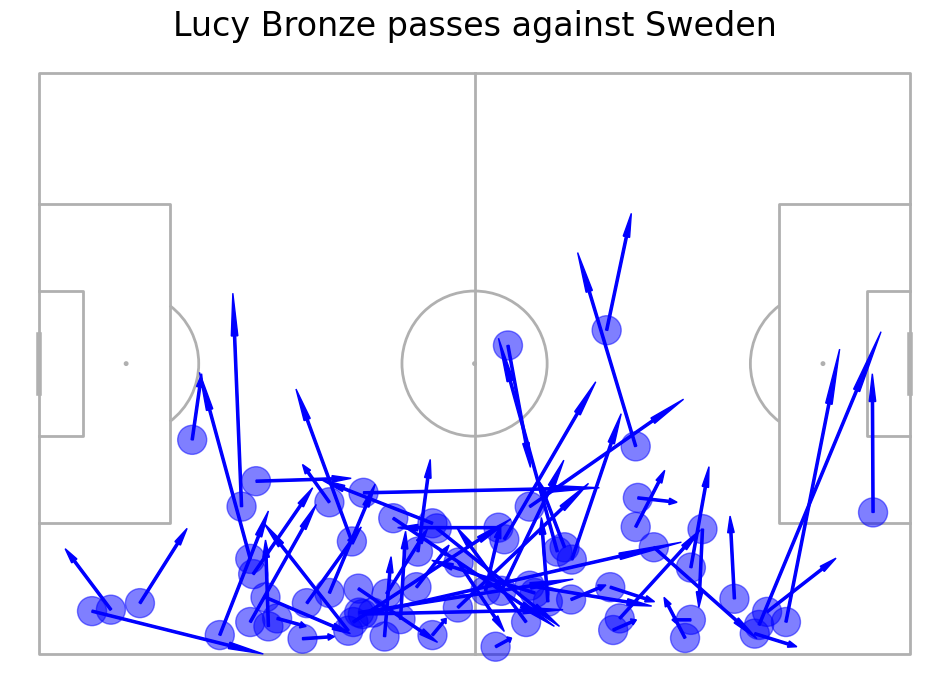

In [19]:
pitch = mpl.Pitch()
fig, ax = pitch.draw(figsize = (10,7))

for i, row in passes.iterrows():
    if row.player_name == 'Lucy Bronze':
        x = row.x
        y = row.y
        pass_circle = plt.Circle((x,y), 2, color = 'blue', alpha = 0.5)
        ax.add_patch(pass_circle)

        dx = row.end_x - x
        dy = row.end_y - y
        pass_arrow = plt.Arrow(x, y, dx, dy, color = 'blue', width = 1.5)
        ax.add_patch(pass_arrow)

ax.set_title('Lucy Bronze passes against Sweden', fontsize = 24)
fig.set_size_inches(10,7)
plt.show()

### Plotting passes using mpl

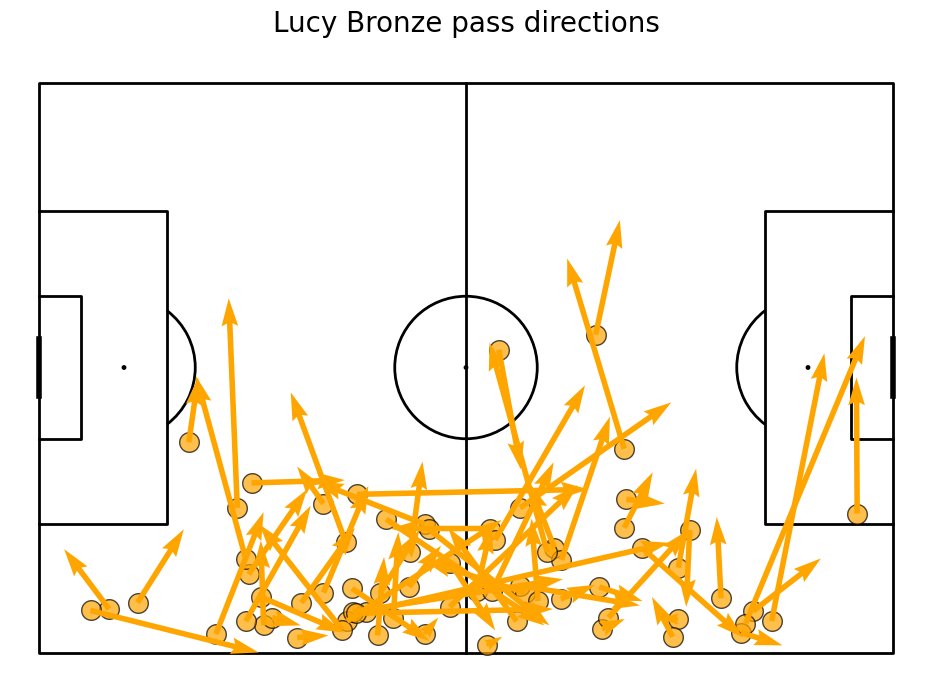

In [22]:
lucy_df = passes.loc[passes.player_name == 'Lucy Bronze', ['x','y','end_x','end_y']]

pitch = mpl.Pitch(line_color = 'black')
fig, ax = pitch.draw(figsize = (10,7))

pitch.scatter(lucy_df.x, lucy_df.y, s = 200, ax = ax, alpha = 0.7, color = 'orange', edgecolors = 'black')
# pitch.annotate((caroline_df.x,caroline_df.y), (caroline_df.x - 1, caroline_df.y + 2), ax = ax, fontsize = 10)
pitch.arrows(lucy_df.x, lucy_df.y,lucy_df.end_x, lucy_df.end_y, ax = ax,
              alpha = 1, color = 'orange')
fig.suptitle('Lucy Bronze pass directions', fontsize = 20)
plt.show()